<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/JELab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import GradientBoostingClassifier

## GET KYPHOSIS DATA and GATHER INFORMATION
Load the Kyphosis data from the .csv file provided (BBLearn, week 8) and read into a pandas Dataframe 


In [ ]:
df = pd.read_csv("/content/sample_data/kyphosis.csv")
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


Explore the data using Pandas dataframe methods to display general information, statisticalanalysis, check for missing values, display some of the rows of values, get value counts for thetwo classifications (absent, present), etc

display general information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
print("Type of data :",type(df))
print("Length of data :",len(df))
print("Shape of data :",df.shape)

Type of data : <class 'pandas.core.frame.DataFrame'>
Length of data : 81
Shape of data : (81, 4)


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
df.describe(include=np.object)

,Kyphosis
count,81
unique,2
top,absent
freq,64


check for missing values

In [ ]:
df.isnull().values.any()

False

display some of the rows of values

In [ ]:
df[:6]

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16


get value counts for the
two classifications (absent, present)

In [ ]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Kyphosis'] = label_encoder.fit_transform(df['Kyphosis'])
df['Kyphosis'].unique()

array([0, 1])

#VISUALIZE the data using MATPLOTLIB and/or SEABORN


Create a labeled bar graph/histogram, to display the count of each classification, side by side

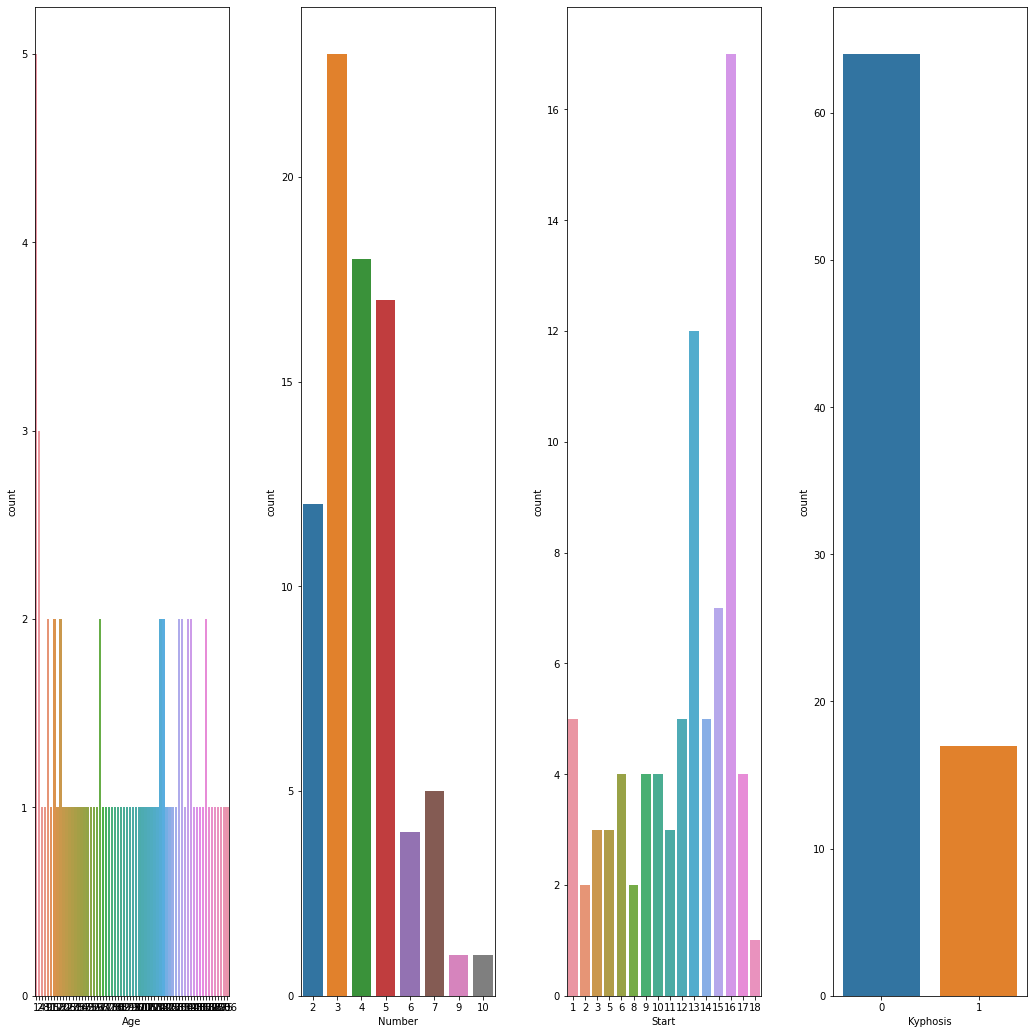

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(15,15))
sns.countplot(x="Age", data=df, ax=axes[0])
sns.countplot(x="Number", data=df, ax=axes[1])
sns.countplot(x="Start", data=df, ax=axes[2])
sns.countplot(x="Kyphosis", data=df, ax=axes[3])
fig.tight_layout(pad=3.0)

Create a labeled pairwise plot, to display classification (kyphosis) correlations between the
numeric features


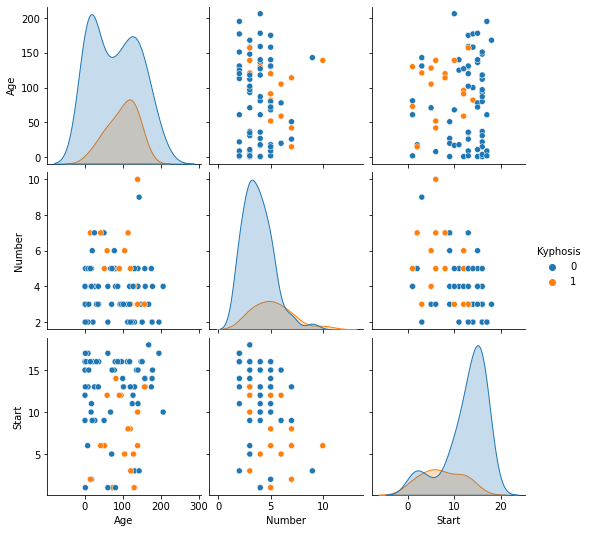

In [ ]:
sns.pairplot(df,hue='Kyphosis')

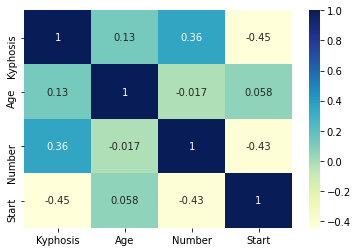

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap="YlGnBu", annot=True)

## Split the Data

Reserve the Kyphosis attribute as your target label


In [ ]:
X = df[['Age', 'Number', 'Start']]
Y = df['Kyphosis']

Use a 75/25% train/test split for all models, random_state=40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

Confirm your data types, shapes, columns, etc.

In [ ]:
print("\nLength of training data X_train:",len(X_train))
print("\nLength of training data y_train:",len(y_train))
print("\nLength of test data X_test:",len(X_test))
print("\nLength of test data y_test:",len(y_test))
print("\nTraining data info:")
print(X_train.describe())
print(X_train.info())
print("\nTest data info:")
print(X_test.describe())
print(X_test.info())
print("\nData type training:",type(X_train))
print("\nData type test:",type(X_test))


Length of training data X_train: 60

Length of training data y_train: 60

Length of test data X_test: 21

Length of test data y_test: 21

Training data info:
              Age     Number      Start
count   60.000000  60.000000  60.000000
mean    84.183333   3.983333  11.500000
std     57.095368   1.567592   4.917971
min      1.000000   2.000000   1.000000
25%     30.000000   3.000000   9.000000
50%     89.000000   4.000000  13.000000
75%    128.500000   5.000000  16.000000
max    206.000000  10.000000  18.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 33 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     60 non-null     int64
 1   Number  60 non-null     int64
 2   Start   60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Test data info:
              Age     Number      Start
count   21.000000  21.000000  21.000000
mean    82.142857   4.238095  11.476190
std     62.325986   1.7

## Decision Tree Classifier

Assess accuracy: display predictions, confusion matrix, classification report, and accuracy score

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

display predictions

In [ ]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

confusion matrix, classification report

In [ ]:
print("confusion matrix for Decision Tree Classifier: ")
print(confusion_matrix(y_test, y_pred_tree))
print("classification report for Decision Tree Classifier: ")
print(classification_report(y_test, y_pred_tree))

confusion matrix for Decision Tree Classifier: 
[[16  2]
 [ 2  1]]
classification report for Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.33      0.33      0.33         3

    accuracy                           0.81        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.81      0.81      0.81        21



accuracy score

In [ ]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.810


Hyperparameters Tuning for Decision Tree Classifier

Improve model by adjusting appropriate hyperparameters, seeking the best generalized model
Depth, min samples, max nodes, max features, random state, splitter, etc

In [ ]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "splitter": ["best", "random"],
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": range(1,10)
}

In [ ]:
grid = GridSearchCV(tree, param_grid=param_dict, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
       

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'random_state': 6,
 'splitter': 'random'}

In [ ]:
print("accuracy score for Decision Tree Classifier after hyperparameter tuning:")
print(grid.best_score_)

accuracy score for Decision Tree Classifier after hyperparameter tuning:
0.8833333333333334


In [ ]:
print(grid.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='random')


Display model as a TREE, using sklearn.tree graphviz

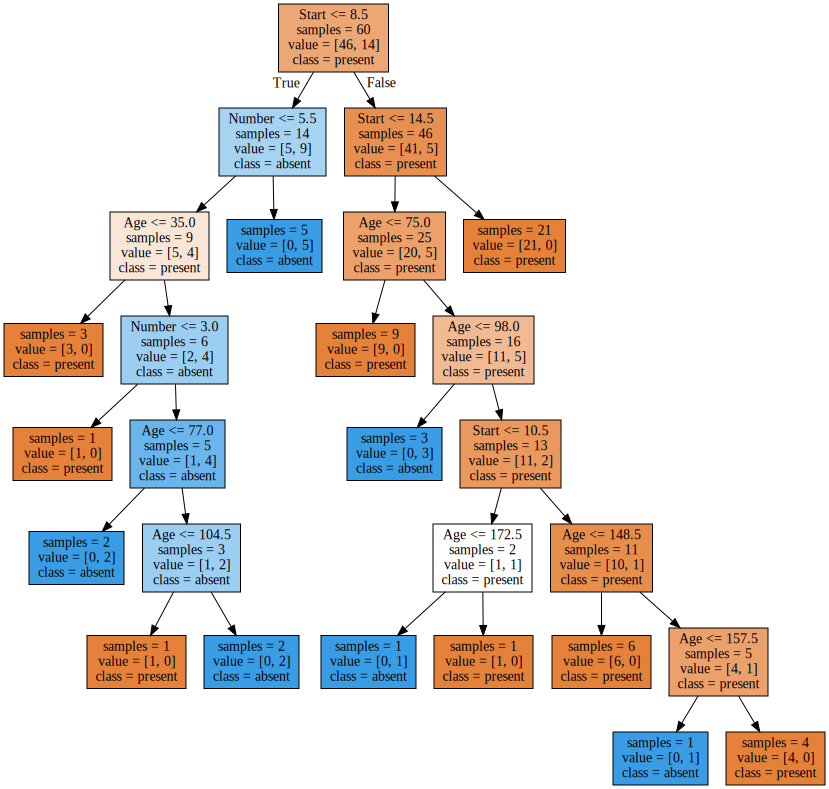

In [ ]:
export_graphviz(tree, out_file="tree.dot", class_names=["present", "absent"],
                feature_names=X_train.columns, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Display model feature importances as a bar graph

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.50363405 0.14211772 0.35424824]


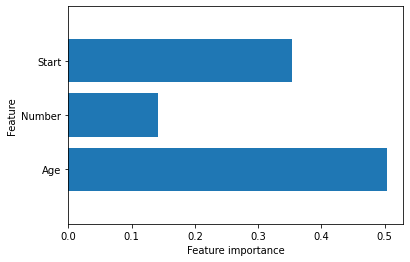

In [ ]:
def plot_feature_importances_decision_tree_classifier(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_decision_tree_classifier(tree)

# Random Forest Classifier

Assess accuracy: display predictions, confusion matrix, classification report, and accuracy score

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

display predictions

In [ ]:
y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

accuracy score

In [ ]:
print("accuracy score for Random Forest Classifier:",accuracy_score(y_test, y_pred_forest))

accuracy score for Random Forest Classifier:
0.8571428571428571


confusion matrix

In [ ]:
print("confusion matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_forest))

confusion matrix for Random Forest Classifier:
[[17  1]
 [ 2  1]]


classification report

In [ ]:
print("classification report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

classification report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.50      0.33      0.40         3

    accuracy                           0.86        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.84      0.86      0.84        21



Display model feature importances as a bar graph


In [ ]:
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.33909408 0.25849033 0.4024156 ]


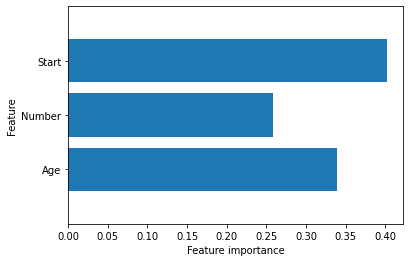

In [ ]:
plot_feature_importances_decision_tree_classifier(forest)

## Hyperparameters Tuning for Random Forest Classifier

Improve model by adjusting appropriate hyperparameters, seeking the best generalized model
Learning Rate, number of estimators, depth, min samples, max nodes, max features, etc

In [ ]:
param_dict = {
    "bootstrap": [True],
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": [8, 10, 12],
    "min_samples_leaf": [3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
    "n_estimators": [100, 200, 300, 1000]
}

In [ ]:
grid_forest = GridSearchCV(forest, param_grid=param_dict, n_jobs=-1)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_forest.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
print("accuracy score for Random Forest Classifier after hyperparameter tuning:")
print(grid_forest.best_score_)

accuracy score for Random Forest Classifier after hyperparameter tuning:
0.8666666666666666


In [ ]:
print(grid_forest.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Gradient Boosting Classifier

Assess accuracy: display predictions, confusion matrix, classification report, and accuracy score

In [ ]:
gradboost = GradientBoostingClassifier()
gradboost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

display predictions

In [ ]:
y_pred_gradboost = gradboost.predict(X_test)
y_pred_gradboost

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

 accuracy score

In [ ]:
print("accuracy score for Gradient Boosting Classifier:")
print(accuracy_score(y_test, y_pred_gradboost))

accuracy score for Gradient Boosting Classifier:
0.8571428571428571


confusion matrix

In [ ]:
print("confusion matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_gradboost))

confusion matrix for Random Forest Classifier:
[[17  1]
 [ 2  1]]


classification report

In [ ]:
print("classification report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_gradboost))

classification report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.50      0.33      0.40         3

    accuracy                           0.86        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.84      0.86      0.84        21



Display model feature importances as a bar graph


In [ ]:
print("Feature importances:")
print(gradboost.feature_importances_)

Feature importances:
[0.39366365 0.18319386 0.4231425 ]


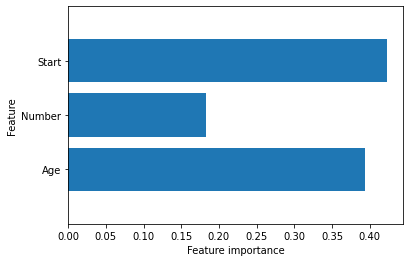

In [ ]:
plot_feature_importances_decision_tree_classifier(gradboost)

## Hyperparameters Tuning for Gradient Boosting Classifier

Improve model by adjusting appropriate hyperparameters, seeking the best generalized model
Learning Rate, number of estimators, depth, min samples, max nodes, max features, etc.

In [57]:
param_dict = {
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": range(1,10)
}

In [ ]:
print(gradboost.get_params())
grid_gradboost = GridSearchCV(gradboost, param_grid=param_dict, n_jobs=-1)
grid_gradboost.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [ ]:
grid_gradboost.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'random_state': 6}

In [ ]:
print("accuracy score for Gradient Boosting Classifier after hyperparameter tuning:")
print(grid_gradboost.best_score_)

accuracy score for Gradient Boosting Classifier after hyperparameter tuning:
0.8666666666666668


In [52]:
print(grid_gradboost.best_estimator_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
 

## CONCLUSION

1. Probability of kyphosis presence is 0.25.
2. Number feature is least important across all classifiers compared to Age and Start columns.